In [1]:
import spacy
from gensim import corpora, models
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, Word2Vec, KeyedVectors
import gensim.downloader as api
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex
from pathlib import Path
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
## To download pre-trained Word2Vec

#model = api.load('word2vec-google-news-300')

In [3]:
## Save keyed vectors so you don't have to download model again
#model.save('vectors.kv')

wv_model = KeyedVectors.load('Data/vectors.kv')

In [4]:
# Index of term similarities for entire model
termsim_index = WordEmbeddingSimilarityIndex(wv_model)

## Original Story

In [5]:
# Import text file
with open('Data/Original/orginal text.txt') as file_object:
    lines_o = file_object.readlines()
    lines_o = [line.rstrip() for line in lines_o]

In [6]:
# Tokenize & lemmatizatize
nlp = spacy.load('en_core_web_sm')
texts_o = []
for line in lines_o:
    text_o = []
    doc = nlp(line)
    for w in doc:
        if not w.is_punct:
            text_o.append(w.lemma_)
    texts_o.append(text_o)
    
# Create dictionary and corpus for original text
dictionary_o = corpora.Dictionary(texts_o)
corpus_o = [dictionary_o.doc2bow(text) for text in texts_o]

## Group 1 Texts

In [8]:
# Create empty data frame
o1_similarity = pd.DataFrame(columns = ['Soft Cosine Similarity'])

# Read in texts
for p in Path('Data/Group 1').glob('*.txt'):
    with p.open(encoding = 'UTF-8') as f:
        lines_1 = f.readlines()
        #Strip whitespaces
        lines_1 = [line.rstrip() for line in lines_1]
        
        texts_1 = []
        # tokenize & lemmatize
        for line in lines_1:
            text_1 = []
            doc = nlp(line)
            for w in doc:
                if not w.is_punct:
                    text_1.append(w.lemma_)
            texts_1.append(text_1)
        
        # Create a dictionary
        dictionary = corpora.Dictionary(texts_o)
        dictionary.add_documents(texts_1)
        # Create corpus from dictionary
        corpus_1 = [dictionary.doc2bow(text) for text in texts_1]
        o1_corpus = corpus_o + corpus_1
        # TF-IDF weighting
        o1_tfidf = TfidfModel(o1_corpus)
        tfidf_o = o1_tfidf[corpus_o]
        tfidf_1 = o1_tfidf[corpus_1]
        
        # Matrix of similarities
        termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, o1_tfidf)
        # Compute and sum similarities
        sim_sum = 0
        similarity_db = []
        for i in range(len(tfidf_1)):
            similarity = termsim_matrix.inner_product(tfidf_o[i], tfidf_1[i], normalized=(True, True))
            sim_sum += similarity
        # Take average similarity score for each text
        one_sim_avg = sim_sum / len(tfidf_1)
        similarity_db.append(one_sim_avg)
        o1_similarity.loc[len(o1_similarity)] = similarity_db

100%|████████████████████████████████████████████████████████████████████████████████| 311/311 [01:03<00:00,  4.88it/s]


In [9]:
# Save similarity scores for future use
o1_similarity.to_csv(r'Data/o1_similarity.csv')

In [10]:
print(o1_similarity)

   Soft Cosine Similarity
0                0.535799
1                0.521865
2                0.552429
3                0.598369
4                0.568851


In [11]:
# Average group-wise similarity
o1_mean = o1_similarity.mean()
print(o1_mean)

Soft Cosine Similarity    0.555463
dtype: float64


## Group 2 Texts

In [13]:
# Create empty data frame
o2_similarity = pd.DataFrame(columns = ['Soft Cosine Similarity'])

# Read in texts
for p in Path('Data/Group 2').glob('*.txt'):
    with p.open(encoding = 'UTF-8') as f:
        lines_2 = f.readlines()
        #Strip whitespaces
        lines_2 = [line.rstrip() for line in lines_2]
        
        texts_2 = []
        # tokenize & lemmatize
        for line in lines_2:
            text_2 = []
            doc = nlp(line)
            for w in doc:
                if not w.is_punct:
                    text_2.append(w.lemma_)
            texts_2.append(text_2)
        
        # Create a dictionary
        dictionary = corpora.Dictionary(texts_o)
        dictionary.add_documents(texts_2)
        # Create corpus from dictionary
        corpus_2 = [dictionary.doc2bow(text) for text in texts_2]
        o2_corpus = corpus_o + corpus_2
        # TF-IDF weighting
        o2_tfidf = TfidfModel(o2_corpus)
        tfidf_o = o2_tfidf[corpus_o]
        tfidf_2 = o2_tfidf[corpus_2]
        
        # Matrix of similarities
        termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, o2_tfidf)
        # Compute and sum similarities
        sim_sum = 0
        similarity_db = []
        for i in range(len(tfidf_2)):
            similarity = termsim_matrix.inner_product(tfidf_o[i], tfidf_2[i], normalized=(True, True))
            sim_sum += similarity
        # Take average similarity score for each text
        two_sim_avg = sim_sum / len(tfidf_2)
        similarity_db.append(two_sim_avg)
        o2_similarity.loc[len(o2_similarity)] = similarity_db

100%|████████████████████████████████████████████████████████████████████████████████| 317/317 [01:05<00:00,  4.84it/s]


In [14]:
# Save similarity scores for future use
o2_similarity.to_csv(r'Data/o2_similarity.csv')

In [15]:
print(o2_similarity)

   Soft Cosine Similarity
0                0.544813
1                0.547622
2                0.574818
3                0.560245
4                0.570318


In [16]:
# Average group-wise similarity
o2_mean = o2_similarity.mean()
print(o2_mean)

Soft Cosine Similarity    0.559564
dtype: float64


## Synonym-Only Benchmark

In [17]:
with open('Data/Synonyms.txt') as file_object:
    lines_syn = file_object.readlines()
    lines_syn = [line.rstrip() for line in lines_syn]
    
texts_syn = []
for line in lines_syn:
    text_syn = []
    doc = nlp(line)
    for w in doc:
        if not w.is_punct:
            text_syn.append(w.lemma_)
    texts_syn.append(text_syn)

dictionary = corpora.Dictionary(texts_o)
dictionary.add_documents(texts_syn)
corpus_syn = [dictionary.doc2bow(text) for text in texts_syn]
osyn_corpus = corpus_o + corpus_syn
osyn_tfidf = TfidfModel(osyn_corpus)
tfidf_o = osyn_tfidf[corpus_o]
tfidf_syn = osyn_tfidf[corpus_syn]

In [18]:
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, osyn_tfidf)

100%|████████████████████████████████████████████████████████████████████████████████| 307/307 [01:07<00:00,  4.57it/s]


In [19]:
sim_sum = 0
for i in range(len(tfidf_syn)):
    similarity = termsim_matrix.inner_product(tfidf_o[i], tfidf_syn[i], normalized=(True, True))
    sim_sum += similarity
syn_sim_avg = sim_sum / len(tfidf_syn)

In [20]:
print(syn_sim_avg)

0.6176419766812489


## Princess and the Pea Benchmark

In [21]:
with open('Data/Princess and Pea.txt') as file_object:
    lines_pea = file_object.readlines()
    lines_pea = [line.rstrip() for line in lines_pea]
    
texts_pea = []
for line in lines_pea:
    text_pea = []
    doc = nlp(line)
    for w in doc:
        if not w.is_punct:
            text_pea.append(w.lemma_)
    texts_pea.append(text_pea)

dictionary = corpora.Dictionary(texts_o)
dictionary.add_documents(texts_pea)
corpus_pea = [dictionary.doc2bow(text) for text in texts_pea]
opea_corpus = corpus_o + corpus_pea
opea_tfidf = TfidfModel(opea_corpus)
tfidf_o = opea_tfidf[corpus_o]
tfidf_pea = osyn_tfidf[corpus_pea]

In [22]:
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, opea_tfidf)

100%|████████████████████████████████████████████████████████████████████████████████| 331/331 [01:12<00:00,  4.58it/s]


In [23]:
sim_sum = 0
for i in range(len(tfidf_pea)):
    similarity = termsim_matrix.inner_product(tfidf_o[i], tfidf_pea[i], normalized=(True, True))
    sim_sum += similarity
pea_sim_avg = sim_sum / len(tfidf_pea)

In [24]:
print(pea_sim_avg)

0.11051805293495168


## Similarity Scores Box Plot

In [25]:
import matplotlib.pyplot as plt
import PIL
import seaborn as sns

In [26]:
o1_similarity = pd.read_csv('Data/o1_similarity.csv')
o2_similarity = pd.read_csv('Data/o2_similarity.csv')

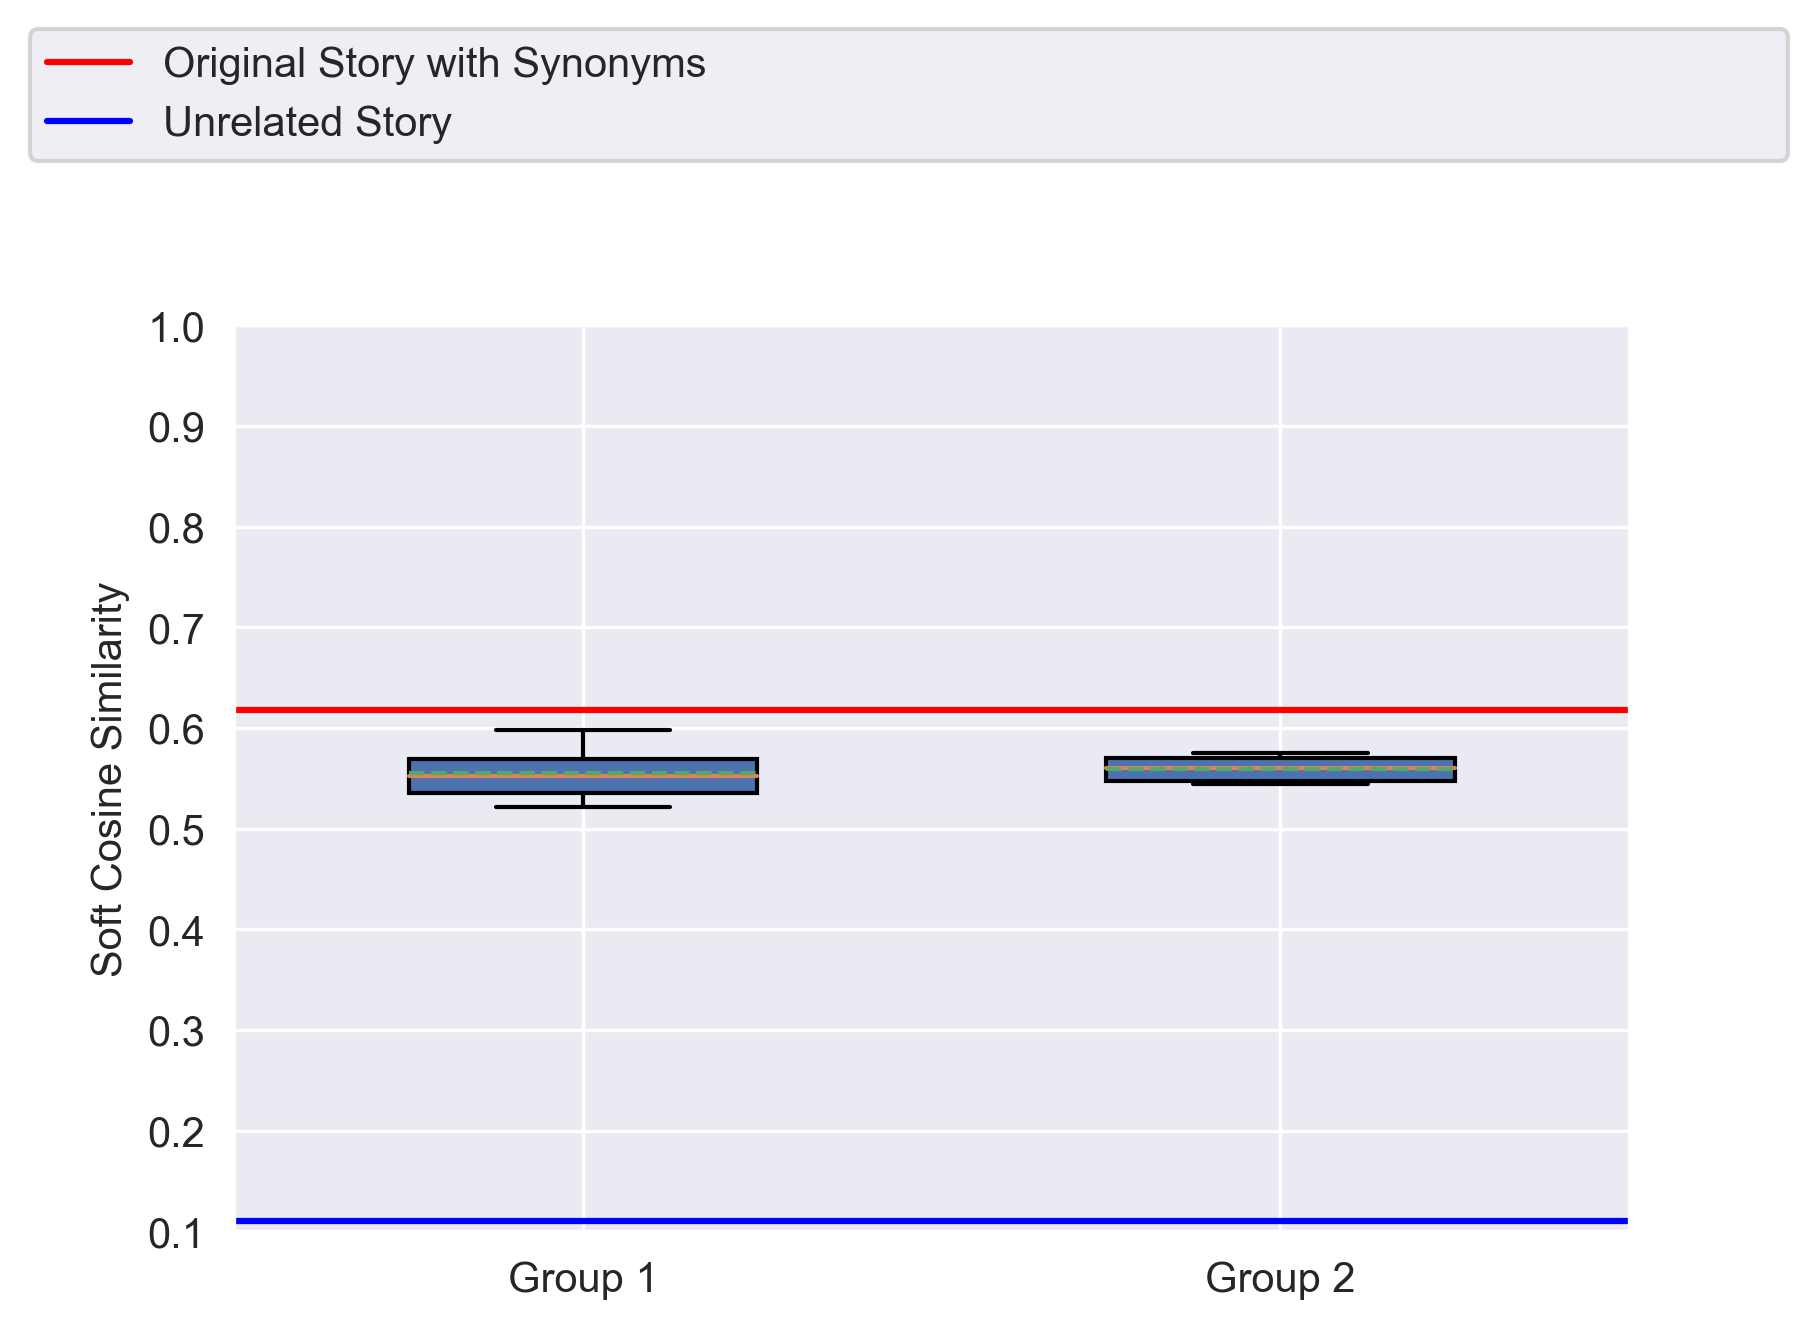

In [30]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
sns.set_palette('deep')
plt.rcParams['figure.dpi'] = 300
ax.boxplot([o1_similarity['Soft Cosine Similarity'],o2_similarity['Soft Cosine Similarity']], patch_artist = True, meanline = True, showmeans = True, widths = (0.5, 0.5))
plt.axhline(syn_sim_avg, c='r', label='Original Story with Synonyms')
plt.axhline(pea_sim_avg, c='b', label='Unrelated Story')
plt.xticks([1,2], ['Group 1', 'Group 2'])
plt.ylabel('Soft Cosine Similarity')
plt.ylim([0.1, 1.0])
fig.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower right", mode="expand")
plt.show()

fig.savefig('Plots/SCS.png', bbox_inches="tight")